In [83]:
import pandas as pd
import numpy as np
import seaborn as sns

In [84]:
df = pd.read_excel('lamoda.xlsx', index_col= None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 7 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Город                                           151 non-null    object 
 1   ФИО сотрудника                                  151 non-null    object 
 2   Транзитный склад                                151 non-null    object 
 3   Общий итог сканирований по сотруднику           151 non-null    int64  
 4   Общее кол-во паков обработанных на всем складе  151 non-null    int64  
 5   Кол-во отработанных часов по сотруднику         151 non-null    float64
 6   Кол-во отработанных смен по сотруднику          151 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 8.4+ KB


In [85]:
## null значений в датафрейме нет
df.isnull().sum().sum()

0

In [86]:
## подготовим датафрейм: переименуем столбцы, чтобы удобнее с ними работать
df = df.rename(columns={"Город": "city", "ФИО сотрудника": "worker_name", "Транзитный склад": "storage", 
                "Общий итог сканирований по сотруднику": "scans", 
                "Общее кол-во паков обработанных на всем складе": "pacs_total", 
                "Кол-во отработанных часов по сотруднику": "worker_hours", 
                "Кол-во отработанных смен по сотруднику": "worker_shifts"})

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   city           151 non-null    object 
 1   worker_name    151 non-null    object 
 2   storage        151 non-null    object 
 3   scans          151 non-null    int64  
 4   pacs_total     151 non-null    int64  
 5   worker_hours   151 non-null    float64
 6   worker_shifts  151 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 8.4+ KB


In [108]:
## определим показатели для оценки деятельности сотрудников
## сформируем датафрейм для работы и определем производительность каждого работника
workers_1 = df.groupby(by = 'worker_name', as_index = False).agg(
    {'scans' : 'sum', 'worker_hours' : 'sum', 'worker_shifts' : 'sum'})
workers_1['scans_in_hour'] = workers_1.scans / workers_1.worker_hours
workers_1['scans_in_shift'] = workers_1.scans / workers_1.worker_shifts

workers_1.sort_values(by = ['scans_in_hour', 'scans_in_shift'], ascending = False).head(10)

,worker_name,scans,worker_hours,worker_shifts,scans_in_hour,scans_in_shift
66,Лазарев Леонард Адольфович,21978,86.00,23,255.558140,955.565217
47,Иванов Роберт Юлианович,23855,96.75,26,246.563307,917.500000
101,Русаков Аполлон Антонинович,76405,331.25,32,230.656604,2387.656250
70,Лобанов Нелли Парфеньевич,35735,161.25,28,221.612403,1276.250000
11,Бобров Тарас Романович,27748,129.00,24,215.100775,1156.166667
100,Романов Назарий Миронович,38144,182.75,24,208.722298,1589.333333
71,Логинов Артур Ярославович,29887,164.73,32,181.430219,933.968750
121,Тихонов Исак Ефимович,15417,86.00,21,179.267442,734.142857
122,Уваров Адам Фролович,53293,301.00,18,177.053156,2960.722222
119,Тимофеев Арсений Федосеевич,20745,120.00,58,172.875000,357.672414


In [107]:
## найдем долю сканов каждого работника относительно общего числа сканов
total = df.groupby('storage', as_index = False).agg({'scans' : 'sum'})
total = total.rename(columns = {'scans' : 'scans_total'})

df_dev = df.merge(total, how = 'inner', on = 'storage')

workers_2 = df_dev[['worker_name', 'storage', 'scans', 'scans_total']]
workers_2['part_of_scans'] = workers_2.scans / workers_2.scans_total * 100
workers_2.sort_values(by = "part_of_scans", ascending = False).head(10)

C:\Users\elusk\AppData\Local\Temp\ipykernel_3436\166919924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  workers_2['part_of_scans'] = workers_2.scans / workers_2.scans_total * 100


,worker_name,storage,scans,scans_total,part_of_scans
130,Русаков Аполлон Антонинович,LMD Vladikavkaz,76405,105180,72.642137
2,Воронцов Андрей Христофорович,LMD Syktyvkar,345,671,51.415797
123,Селиверстов Дональд Олегович,LMD Orel,12281,24454,50.220823
122,Кудрявцев Гордей Дмитриевич,LMD Orel,9008,24454,36.836509
15,Дементьев Анатолий Николаевич,LMD Chelyabinsk,12015,36799,32.650344
1,Гордеев Осип Пантелеймонович,LMD Syktyvkar,206,671,30.700447
128,Селиверстов Дональд Олегович,LMD Tula,15134,59123,25.597483
145,Лобанов Нелли Парфеньевич,LMD Samara,35735,143842,24.843231
132,Иванов Роберт Юлианович,LMD Vladikavkaz,23855,105180,22.680167
117,Прохоров Юлий Миронович,LMD Kaluga,8230,38973,21.117184


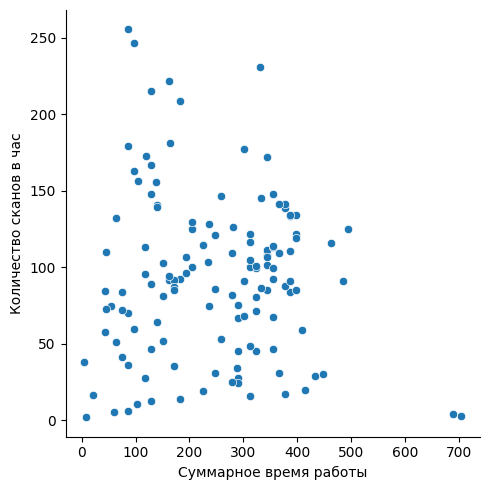

In [113]:
## таким образом, на основании имеющихся данных, можем ввести три показателя для оценки деятельности сотрудника склада
## первый - количество сканов, произведенное за час работы в среднем

ax = sns.relplot(data = workers_1, x = "worker_hours", y = "scans_in_hour")
ax.set(xlabel = 'Суммарное время работы', ylabel = 'Количество сканов в час')

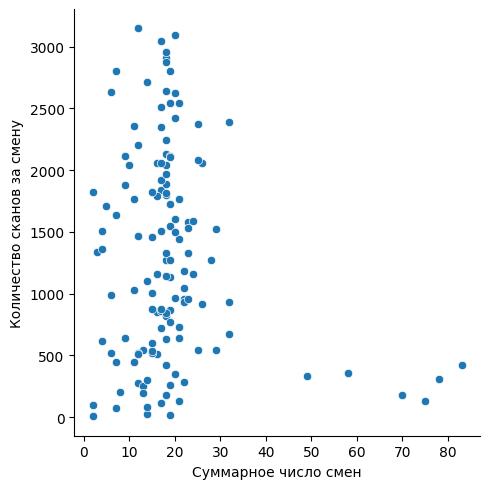

In [114]:
## второй - количество сканов, произведенное за одну смену в среднем

bx = sns.relplot(data = workers_1, x = "worker_shifts", y = "scans_in_shift")
bx.set(xlabel = 'Суммарное число смен', ylabel = 'Количество сканов за смену')

[Text(0.5, 0, 'Доля произведенных сканов'),
 Text(0, 0.5, 'Имя работника'),
 Text(0.5, 1.0, 'LMD Vladikavkaz')]

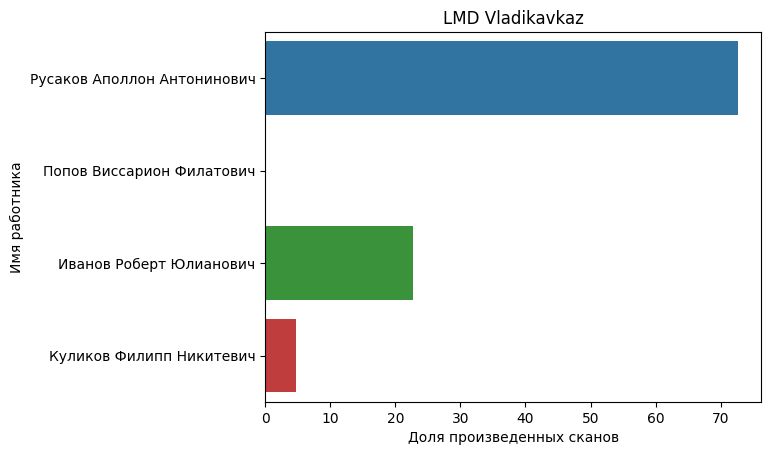

In [125]:
## третий - доля сканов каждого работника склада, относительно суммарного количества сканов этого склада
## приведем пример визуализации данного показателя для склада LMD Vladikavkaz

df1 = workers_2.query("storage == 'LMD Vladikavkaz'")

cx = sns.barplot(data = df1, x = 'part_of_scans', y = 'worker_name', orient = 'h')
cx.set(xlabel = 'Доля произведенных сканов', ylabel = 'Имя работника', title = 'LMD Vladikavkaz')

In [136]:
## перейдем к анализу деятельности складов
## данную задачу можно решить, определив два показателя: общее число сканов и число действий, связанных с логистикой
## общее число сканов было определено ранее

storages = df_dev[['city', 'storage', 'pacs_total', 'scans_total']]
storages['logistics_total'] = storages.scans_total - storages.pacs_total

storages.head(10)

C:\Users\elusk\AppData\Local\Temp\ipykernel_3436\1103843477.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  storages['logistics_total'] = storages.scans_total - storages.pacs_total


,city,storage,pacs_total,scans_total,logistics_total
0,Сыктывкар,LMD Syktyvkar,561,671,110
1,Сыктывкар,LMD Syktyvkar,561,671,110
2,Сыктывкар,LMD Syktyvkar,561,671,110
3,Челябинск,LMD Chelyabinsk,5770,36799,31029
4,Челябинск,LMD Chelyabinsk,5770,36799,31029
5,Челябинск,LMD Chelyabinsk,5770,36799,31029
6,Челябинск,LMD Chelyabinsk,5770,36799,31029
7,Челябинск,LMD Chelyabinsk,5770,36799,31029
8,Челябинск,LMD Chelyabinsk,5770,36799,31029
9,Челябинск,LMD Chelyabinsk,5770,36799,31029


In [141]:
## разобьем датафрейм storages на группы по территориальному признаку
## отрицательный показатель logistics_total говорит о том, что склад больше занимается хранением товара, нежели чем
## приемом, отгрузкой и остальными операциями
area = storages.groupby('city', as_index = False).agg({'scans_total' : 'sum', 'logistics_total' : 'sum'})
area.sort_values(by = ['scans_total', 'logistics_total'], ascending = False)

,city,scans_total,logistics_total
2,Москва,113244106,65659748
4,Ростов-на-Дону,2570821,712294
5,Самара,863052,335826
7,Тула,710846,8196
8,Челябинск,478387,403377
0,Владикавказ,420720,229288
1,Калуга,38973,-283
3,Орел,24454,-1380
6,Сыктывкар,2013,330


[Text(0.5, 0, 'Число работников'), Text(0, 0.5, 'Название склада')]

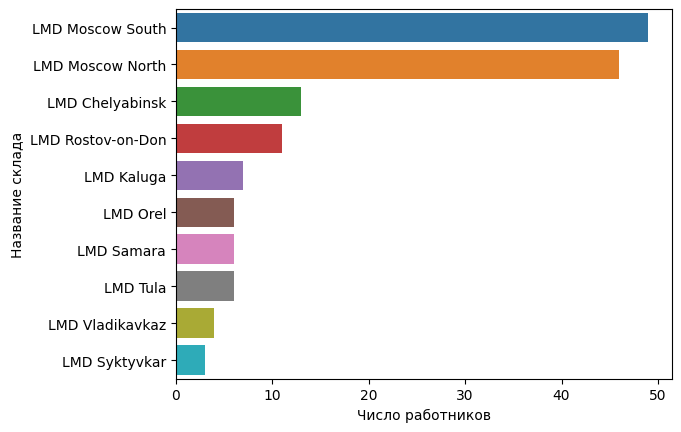

In [150]:
## разобьем датафрейм df_dev на группы по числу сотрудников 
workers_count = df_dev.groupby('storage', as_index = False).agg(
    {'worker_name' : 'count'}).sort_values(by = 'worker_name', ascending = False)
workers_count = workers_count.rename(columns = {'worker_name' : 'number_of_workers'})

dx = sns.barplot(data = workers_count, x = 'number_of_workers', y = 'storage', orient = 'h')
dx.set(xlabel = 'Число работников', ylabel = 'Название склада')